<a href="https://colab.research.google.com/github/leandramvale/python-machine-learning-dados-academicos-cpa/blob/main/03_Aplica%C3%A7%C3%A3o_Pr%C3%A1tica_CPA_(Avalia%C3%A7%C3%A3o_Docente)_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodologia: Avaliação Docente por Unidade Curricular (CPA) - IES

1) Aqui se tem o dataset já com os score medios por indicador por docente.

2) Para esta simulação estão previstos na base de dados 57 docentes avaliados segundo 14 indicadores para cada unidade curricular, sendo que cada indicador é avaliado em uma escala likert de 1 (discordo totalmente) a 5 (concordo totalmente)

3) O questionário aplicado aos discentes é composto de 14 indicadores assim descritos:


```
"001 - O(A) professor(a) é assíduo, pontual e cumpre o horário de início e término das aulas."
"002 - O(A) professor(a) cumpre os prazos previstos na disponibilização das Unidades de Aprendizagem - UAs conforme Cronograma de Aulas, cumprindo também, os prazos de entrega de notas e frequência para que"
"003 - O(A) professor(a) demonstra domínio dos conteúdos, clareza e objetividade em suas explicações, criando conexões entre os temas durante as aulas e as Unidades de Aprendizagem - UAs disponibilizadas."
"004 - O(A) professor(a) se preocupa em relacionar os conteúdos programáticos e as Unidades de Aprendizagem - UAs, com os cenários práticos da futura atuação profissional."
"005 - O(A) professor(a) mantém relacionamento cordial com os(as) alunos(as) e, em sua atuação em sala de aula, demonstra disponibilidade para atender aos estudantes quando solicitado."
"006 - Os Planos de Ensino-Aprendizagem são cumpridos em seus objetivos, conteúdos, atividades e avaliação, e também, são disponibilizados no Classroom (AVA) juntamente com Cronograma de Aulas, material de e"
"007 - As metodologias de ensino e estratégias de orientação, utilizadas pelo(a) professor(a) desafiam você a aprofundar conhecimentos e desenvolver autonomia e pensamento crítico reflexivo."
008 - As avaliações de aprendizagem (presenciais ou não) realizadas são compatíveis com os conteúdos e/ou temas trabalhados nas Unidades de Aprendizagem e em outros materiais disponibilizados no Ambiente Vi
009 - Após a realização das Unidades de Aprendizagem e correção das avaliações é dado feedback aos alunos.
"010 - Há clareza, relevância e atualidade na apresentação dos conteúdos (presenciais ou não) que, por sua vez, são coerentes com o grau de dificuldade das atividades propostas."
"011 - Os trabalhos e/ou atividades da unidade curricular (disciplina) exigem do(a) aluno(a) consulta a diversas fontes de pesquisa (livros, sites, blogs, pesquisas de campo e outras)."
"012 - É possível perceber que o(a) professor(a), de acordo com o desenvolvimento da aprendizagem dos(as) alunos(as), realiza adequações na sua prática pedagógica para melhor atendê-los(as), estabelecendo, q"
"013 - O(A) professor(a) utiliza com êxito, as tecnologias digitais da informação e comunicação (TICs), disponíveis no Ambiente Virtual de Aprendizagem(AVA), como estratégia de ensino e apoio no desenvolvime"
014 - Os materiais de apoio disponibilizados nas Unidades de Aprendizagem (SAIBA +) são de boa qualidade e alinhados aos temas desenvolvidos.
```

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# bibliotecas de machine learning
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA



In [ ]:
#Essas bibliotecas precisam ser carregadas no sitema de arquivos do Google Colab
from hopkins import *
from metric import *
from visual_assessment_of_tendency import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
PATH = './datasets/'
DATA_PATH = PATH+'CPA-2024-01-DADOS-SCORE.csv'

In [ ]:
df = pd.read_csv(DATA_PATH)

In [ ]:
df.head()

,CODPROF,SCORE-01,SCORE-02,SCORE-03,SCORE-04,SCORE-05,SCORE-06,SCORE-07,SCORE-08,SCORE-09,SCORE-10,SCORE-11,SCORE-12,SCORE-13,SCORE-14
0,3,4.261194,4.097015,3.940299,3.910448,4.014925,4.149254,3.970149,4.067164,4.000000,3.835821,4.149254,3.955224,4.074627,4.104478
1,4,4.290323,4.596774,4.532258,4.596774,4.677419,4.629032,4.564516,4.564516,4.548387,4.516129,4.629032,4.629032,4.596774,4.580645
2,5,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.687500
3,17,4.135593,4.245763,4.389831,4.330508,4.389831,4.279661,4.305085,4.279661,4.177966,4.271186,4.245763,4.313559,4.271186,4.355932
4,22,4.236641,4.419847,4.061069,4.190840,4.244275,4.358779,4.183206,4.129771,4.175573,4.015267,4.305344,4.167939,4.137405,4.213740


In [ ]:
df.shape

(57, 15)

Agora vamos usar um algoritmo de aprendizado de máquina não supervisionado como o k-means para identificar grupos semelhantes de professores e utilizar estes dados para ações de gestão.

K-means é um algoritmo de aprendizado de máquina não supervisionado bastante popular que agrupa dados não rotulados em clusters com base em semelhanças. O objetivo é minimizar a soma das distâncias quadradas entre os objetos e a média do cluster ao qual foram atribuídos. A letra k em k-means representa o número de clusters que você deseja formar.
K-means é um método de quantização de vetores que surgiu no processamento de sinais. É bem adequado para conjuntos de dados com um número menor de dimensões, dados numéricos e contínuos, e situações em que você quer agrupar pontos de dados distribuídos aleatoriamente. Por exemplo, o k-means pode ser usado para segmentação de clientes.
K-means é fácil de usar e rápido em grandes conjuntos de dados, mas tem algumas limitações:
Você precisa saber quantos clusters deseja antes de aplicar o k-means, o que pode ser difícil em algumas situações.
K-means é sensível a outliers, que podem distorcer as médias e impactar negativamente os resultados.
A suposição de que os clusters serão semelhantes em tamanho pode limitar a eficácia do k-means em conjuntos de dados com distribuições não convencionais.
O termo "k-means" foi usado pela primeira vez em 1967 por James MacQueen, mas a ideia pode ser rastreada até Hugo Steinhaus em 1957.

Não é necessário normalizar os dados, pois os mesmos já estão em uma escala de 0 a 5.

Análise prévia da qtde. de clusters e da clusterização

##Funções

In [ ]:
def calc_elbow(data, maxclusters):
  inertia = []
  for i in range(1,maxclusters):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
  plt.plot(range(1,maxclusters), inertia)
  plt.title("Elbow")
  plt.show()

In [ ]:
def plot_clusters(data, labels, title, column1, column2, KClusters, strMedia):

  plt.figure(figsize=(8,4))

  # Calculate average grade for each cluster
  #cluster_averages = [data.loc[labels == i, strMedia].mean() for i in range(K)]

  # Define color map (red for low, green for high)
  #color_map = plt.cm.get_cmap('RdYlGn')

  for i,l in zip(range(0,K), KClusters):
    # Get color based on cluster average (normalized to 0-1)
    #color_value = (cluster_averages[i] - min(cluster_averages)) / (max(cluster_averages) - min(cluster_averages))
    #cluster_color = color_map(color_value)

    plt.scatter(data.loc[labels == i, column1], data.loc[labels == i, column2], #c=[cluster_color],
                label = l, alpha=0.5, s=50)


  # Annotate each point with its instance ID
  for j, txt in enumerate(data.index.values):
     plt.annotate(txt, (data.loc[j, column1], data.loc[j, column2]))


  plt.legend()
  plt.title(title)
  plt.xlabel('col1')
  plt.ylabel('col2')
  plt.show()

##Análise prévia da qtde. de clusters e da clusterização

Coeficiente de Elbow ([artigo-01](https://medium.com/@cantarutti_math/elbow-method-o-que-%C3%A9-e-sua-import%C3%A2ncia-48fccc05b38d)) / ([artigo-02](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9))

Elbow que é uma forma mais interessante para identificarmos o melhor número de clusteres para um determinado dataset, pois analisa o ponto de envergadura ideal, esse ponto representa a quantidade ideal de clusteres.

Acontece que o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters, é o ponto da curva mais distante de uma reta traçada entre os pontos 1 e 7.

Neste caso, podemos inferir que um número bom para o número de clusters seria 2 ou 3.



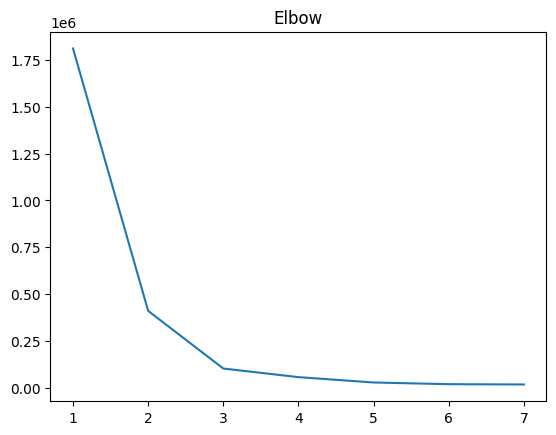

In [ ]:
calc_elbow(df, 8)

A estatística de Hopkins (Lawson e Jurs 1990) é usada para avaliar a tendência de agrupamento de um conjunto de dados, medindo a probabilidade de que um determinado conjunto de dados seja gerado por uma distribuição de dados uniforme. Em outras palavras, ela testa a aleatoriedade espacial dos dados.

Isto é, se H < 0,5, então é improvável que D tenha clusters estatisticamente significativos.

([Artigo](https://sushildeore99.medium.com/really-what-is-hopkins-statistic-bad1265df4b))

In [ ]:
hopkins(df,df.shape[0])

np.float64(0.4169987768643765)

Esta função realiza uma avaliação visual da tendência de agrupamento dos seus dados dentro do DataFrame. Ela provavelmente gera um gráfico ou visualização para ajudar a determinar se seus dados são adequados para algoritmos de agrupamento como o K-means.

Além disso, o uso de VAT e iVAT não deve ser visto como um substituto para métricas (por exemplo, métodos Elbow e Silhouette) projetadas especificamente para determinar o número de clusters que podem ser encontrados em um conjunto de dados. Principalmente, a única função dos algoritmos VAT e iVAT é sugerir visualmente se existem clusters em um conjunto de dados ou não, para evitar o custo elevado de conduzir a análise de cluster em conjuntos de dados que não possuem nenhum.

Em geral, a forma de calcular o número de clusters para um determinado algoritmo VAT/iVAT é calcular o número de quadrados pretos densos dentro do mapa impresso.

([Artigo](https://medium.com/analytics-vidhya/using-visualization-algorithms-vat-ivat-to-assess-cluster-tendency-a89251a2400e))

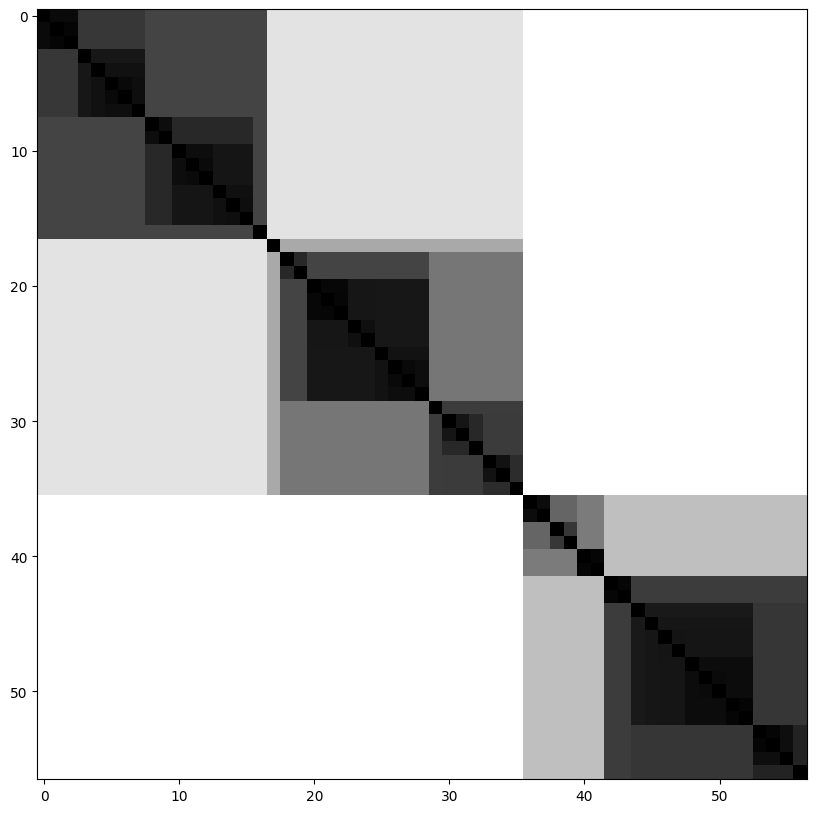

In [ ]:
ivat(df)

In [ ]:
K = 3 #seria o número de clusters escolhido de acordo com a análise acima
#K = 5 #para testar os coeficientes abaixo e avaliar o melhor valor de K

[Coeficiente de Silhouette](https://medium.com/@Suraj_Yadav/silhouette-coefficient-explained-with-a-practical-example-assessing-cluster-fit-c0bb3fdef719): O coeficiente varia de -1 a 1, onde um valor próximo de 1 indica um ponto de dados bem agrupado, um valor próximo de 0 sugere clusters sobrepostos e um valor próximo de -1 indica um ponto de dados classificado incorretamente.

[Coeficiente de Davies Bouldin](https://medium.com/@kalimarapeleteiro/m%C3%A9tricas-de-agrupamento-coeficiente-de-silhueta-%C3%ADndice-de-davies-bouldin-e-%C3%ADndice-de-9462b87ce676): avaliar quão “bem separados” foram os clusters. O resultado índice é similaridade padrão entre os grupos, cujo resultado pode variar de 0 até o infinito positivo. Como queremos que nossos grupos sejam o mais bem particionados quanto possível, quanto mais próximo de 0 for o nosso resultado, melhor.


[Coeficiente de Calinski Harabasz](https://medium.com/@kalimarapeleteiro/m%C3%A9tricas-de-agrupamento-coeficiente-de-silhueta-%C3%ADndice-de-davies-bouldin-e-%C3%ADndice-de-9462b87ce676):o índice mede, simultaneamente duas coisas: quão distantes os clusters estão um dos outros (dispersão entre clusters) e quão densos estão os clusters em si (dispersão dentro dos clusters). Seu valor varia de 0 até o infinito positivo, e quanto maior, mais próximo da solução ideal você está.


In [ ]:
mS = assess_tendency_by_metric(df,'silhouette',K)
mD = assess_tendency_by_metric(df,'davies_bouldin',K)
mC = assess_tendency_by_metric(df,'calinski_harabasz',K)

print("mS = ", mS, "mD = ", mD, "mC = ", mC)

mS =  (np.int64(3), array([0.64874483, 0.73538706])) mD =  (np.int64(3), array([0.47463643, 0.33168131])) mC =  (np.int64(3), array([188.42477492, 450.62685213]))


In [ ]:
m = assess_tendency_by_mean_metric_score(df,K)
print(m)

3.0


Como testamos com K=3 e K=5 vimos que o número ideal de clusters para este conjunto de dados é K=3

Portanto, vamos executar o k-means para K=3, tentando encontrar 3 grupos de professores semelhantes em sua avaliação.

In [ ]:
kmeans = KMeans(n_clusters=K,n_init='auto')
kmeans.fit(df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Calculate the average score across all indicators for each professor
df['AVERAGE_SCORE'] = df.filter(like='SCORE').mean(axis=1)

# Display the DataFrame with the new average score column
display(df[['CODPROF', 'AVERAGE_SCORE']].head())

,CODPROF,AVERAGE_SCORE
0,3,4.037846
1,4,4.567972
2,5,4.745536
3,17,4.285109
4,22,4.202835


In [ ]:
display(df.head())

,CODPROF,SCORE-01,SCORE-02,SCORE-03,SCORE-04,SCORE-05,SCORE-06,SCORE-07,SCORE-08,SCORE-09,SCORE-10,SCORE-11,SCORE-12,SCORE-13,SCORE-14,AVERAGE_SCORE
0,3,4.261194,4.097015,3.940299,3.910448,4.014925,4.149254,3.970149,4.067164,4.000000,3.835821,4.149254,3.955224,4.074627,4.104478,4.037846
1,4,4.290323,4.596774,4.532258,4.596774,4.677419,4.629032,4.564516,4.564516,4.548387,4.516129,4.629032,4.629032,4.596774,4.580645,4.567972
2,5,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.687500,4.745536
3,17,4.135593,4.245763,4.389831,4.330508,4.389831,4.279661,4.305085,4.279661,4.177966,4.271186,4.245763,4.313559,4.271186,4.355932,4.285109
4,22,4.236641,4.419847,4.061069,4.190840,4.244275,4.358779,4.183206,4.129771,4.175573,4.015267,4.305344,4.167939,4.137405,4.213740,4.202835


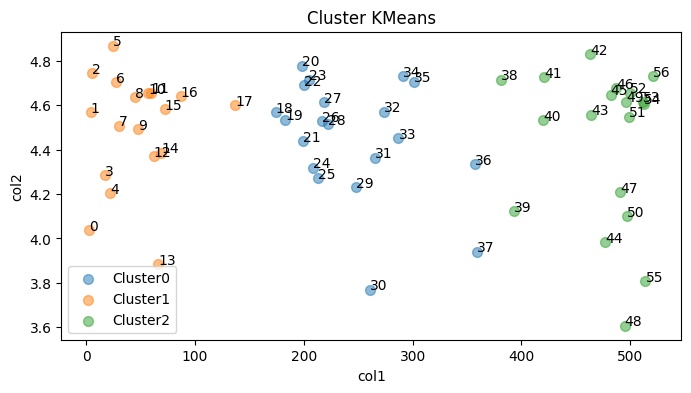

In [ ]:
#plotar os clusters data, labels, title, column1, column2, KClusters
plot_clusters(df, kmeans.labels_, 'Cluster KMeans', df.columns[0], df.columns[15] , KClusters= ['Cluster0','Cluster1','Cluster2'], strMedia='AVERAGE_SCORE')


Como objetivo era encontrar grupos de professores que apresentem resultados das avaliação docente semelhantes.

Agora compete separar estes professores e analisar o que eles tem em comum e aqui seguem algums sugestões:


```
Analisar as avaliações individuais dos docentes que se encontram nos grupos de Clusters 0,1,2;
Realizar grupos focais com os mesmos;
Encontrar insights e/ou outras situações para entender se um grupo apresenta características melhores do que o outro e o que fazer para que um grupo migre para outro;
Melhorar as ações pedagógicas e outras que refletem nestes agrupamentos.
```

BOM TRABALHO!!!!
